In [1]:
%%capture
#""%matplotlib inline
%matplotlib notebook

%load_ext autoreload
%autoreload 2

%reset -f

import numpy as np
import pylab as plt
from matplotlib.lines import Line2D
from begepro.rw import CAENhandler_new as ca
from begepro.dspro import utils as u

import peakutils as pu
from scipy.signal import savgol_filter
from scipy.signal import find_peaks

In [2]:
filename='/home/marco/work/tesi/data/228Th-grafico-tesi-im260421_1/WithTrace/228Th-grafico-tesi-im260421_1__0.npy'

coll=ca.NPYreader(filename,True).get_event()
for i in range(5,30,5):
        filename='/home/marco/work/tesi/data/228Th-grafico-tesi-im260421_1/AnalisiBig3/228Th-grafico-tesi-im260421_1__'+str(i)+'.npy'
        temp=ca.NPYreader(filename,False).get_event()

        if(i==5):
            coll_tot=temp
        else:
            coll_tot=coll_tot+temp
            del(temp)
        #print('opened '+str(i))

print('coll events: '+str(coll.n_trace))
print('coll_tot events: '+str(coll_tot.n_trace))

/home/marco/work/tesi/data/228Th-grafico-tesi-im260421_1/WithTrace/228Th-grafico-tesi-im260421_1
coll events: 136889
coll_tot events: 3559114


In [3]:
curr=coll.get_curr()

<IPython.core.display.Javascript object>


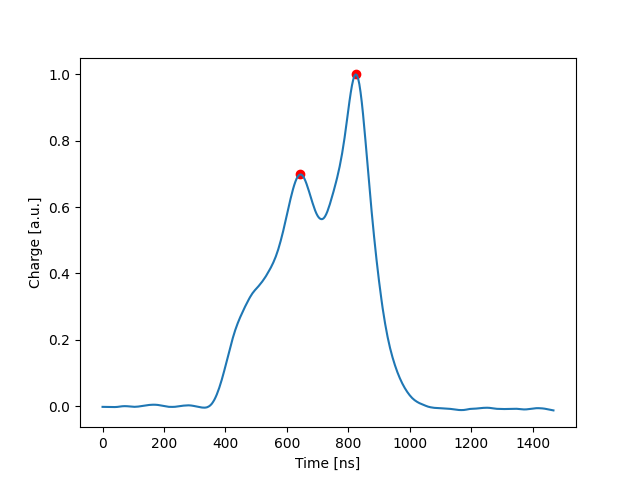

n peaks computed 2


<IPython.core.display.Javascript object>


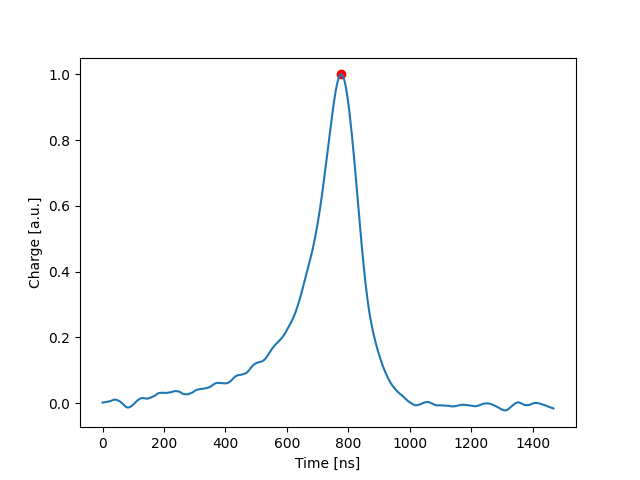

n peaks computed 1


Text(0, 0.5, 'Charge [a.u.]')

In [4]:
#MSE
time=np.arange(0,len(curr[0]),1)*4
plt.figure()

i=255
current=curr[i]/max(curr[i])
plt.plot(time,current)

E=750
maxlim=7

indexes=u.n_peaks().compute_n_peaks(curr[i],coll.get_energies()[i],E,maxlim)
print('n peaks computed '+str(len(indexes)))
plt.scatter(indexes*4,current[indexes],marker='o',color='r')
plt.xlabel('Time [ns]',loc='center')
plt.ylabel('Charge [a.u.]',loc='center')

#SSE
i=7
current=curr[i]/max(curr[i])
plt.figure()
plt.plot(time,current)
indexes=u.n_peaks().compute_n_peaks(current,coll.get_energies()[i],E,maxlim)
print('n peaks computed '+str(len(indexes)))
plt.scatter(indexes*4,current[indexes],marker='o',color='r')
plt.xlabel('Time [ns]',loc='center')
plt.ylabel('Charge [a.u.]',loc='center')

In [5]:
coll_SSE=((coll_tot.subset('energy',0,1618)+coll_tot.subset('energy',1626,2098)+coll_tot.subset('energy',2110,2608)+coll_tot.subset('energy',2618)).subset('ae',1.90e-2,1.95e-2)).subset('energy',1550)
coll_MSE=((coll_tot.subset('energy',0,1590)+coll_tot.subset('energy',1597)).subset('ae',0,1.6e-2)).subset('energy',1550)

n1=coll_MSE.get_n_peaks()
n2=coll_SSE.get_n_peaks()

coll_SSE2=((coll_tot.subset('energy',0,1618)+coll_tot.subset('energy',1626,2098)+coll_tot.subset('energy',2110,2608)+coll_tot.subset('energy',2618)).subset('ae',1.90e-2,1.95e-2))
coll_MSE2=((coll_tot.subset('energy',0,1590)+coll_tot.subset('energy',1597)).subset('ae',0,1.6e-2))

n3=coll_MSE2.get_n_peaks()
n4=coll_SSE2.get_n_peaks()

<IPython.core.display.Javascript object>


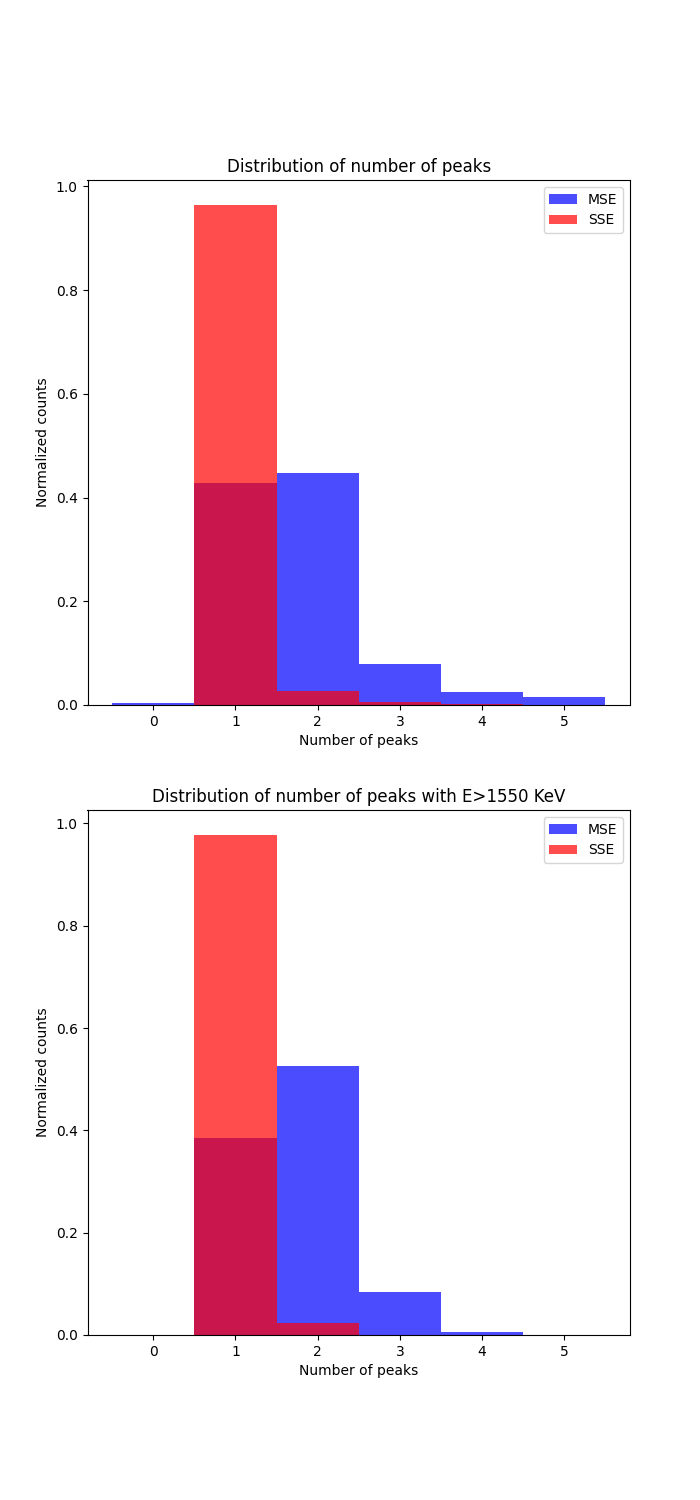

([<matplotlib.axis.XTick at 0x7f52b4e1e2e0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

In [6]:
#Distribution of the events
bins=range(7)

fig,axs=plt.subplots(2,figsize=(7,15))
axs[0].hist(n3,color='b',alpha=0.7,bins=bins,density=True,label='MSE',align='left')
axs[0].hist(n4,color='r',alpha=0.7,bins=bins,density=True,label='SSE',align='left')
axs[0].set_title('Distribution of number of peaks')

axs[1].hist(n1,color='b',alpha=0.7,bins=bins,density=True,label='MSE',align='left')
axs[1].hist(n2,color='r',alpha=0.7,bins=bins,density=True,label='SSE',align='left')
axs[1].set_title('Distribution of number of peaks with E>1550 KeV')

axs[0].set(xlabel='Number of peaks')
axs[1].set(xlabel='Number of peaks')
axs[0].set(ylabel='Normalized counts')
axs[1].set(ylabel='Normalized counts')
axs[0].legend()
axs[1].legend()

plt.xticks(range(6))

<IPython.core.display.Javascript object>


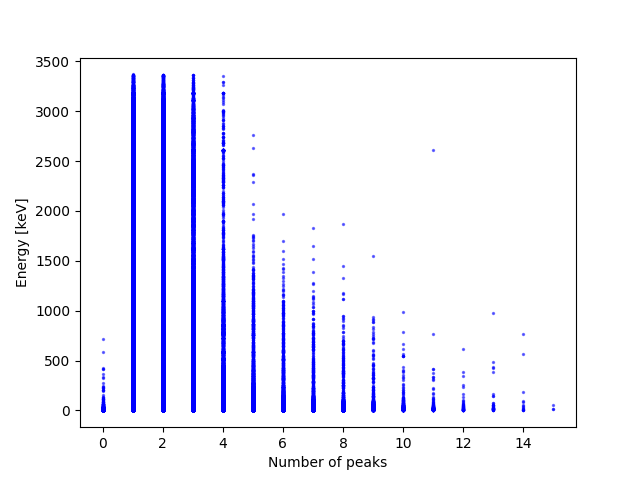

number of events with number of peaks >3: 0.020084773907213985


In [8]:
#Scatter plot
plt.figure()
plt.scatter(coll_tot.get_n_peaks(),coll_tot.get_energies(),s=2,alpha=0.5,color='b')
plt.show()

plt.xlabel('Number of peaks')
plt.ylabel('Energy [keV]')

print('number of events with number of peaks >3: '+str(len(coll_tot.subset('n_peaks',cutmin=4).get_energies())/len(coll_tot.get_energies())))